### API란?
- Application Programming Interface (애플리케이션 프로그래밍 인터페이스)
- 애플리케이션(스마트폰, 카카오톡 서버 등 서로 다른 프로그램)이 인터페이싱하는(요청과 응답을 주고받는) 체계"라고 이해
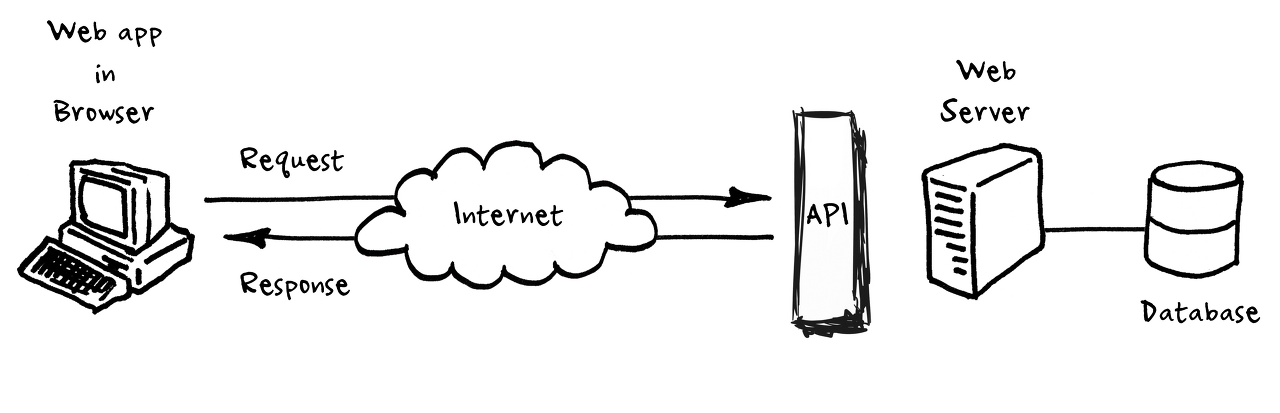

#### API 활용 이유
- 개발 및 관리의 효율성
 * API를 사용하면, 실제로 서비스가 어떻게 구현되었는지는 몰라도 그 서비스를 그대로 가져다 사용할 수 있음
- 유연성, 확장성 
 * 서비스의 신규 개발과 웹/앱 등 채널 확장이 쉬움. 
 * 특히 타사 서비스와의 연계에 있어 큰 강점을 가짐
 #### API 사용방법 
- API 구현 방법: API를 작성하는 다양한 방법들이 있으나, 가장 트렌디한 방법이 바로 REST API 임
- API 결과(데이터) 제공 형식: 주고 받는 데이터 형식은 주로 "JSON", "XML" 포멧을 사용
- API 활용 방법: API 문서로 제공. 
 * 많은 공공기관 및 기업들이 서비스와 데이터를 API 형태로 제공하고 있음
 * 각 API의 활용 방법을 잘 정리해놓은 API 문서를 공개
#### Open API
- "누구나 쓸 수 있도록 공개된(Open) API"
- 대표적으로, 정부의 공공데이터포털(www.data.go.kr)로 해당 사이트를 통해 국가기관이 보유한 수많은 데이터를 API 형태로 무료 공개
- 카카오, 네이버, Google 등 수많은 민간 기업들 또한 자사가 제공하는 다양한 기능들(지도 앱, 포털 검색하기, 로그인 기능 등)을 일반 사람들도 무료로 사용할 수 있도록 API 형태로 제공
 

### 파이썬 크롤링 - BeautifulSoup 기본 개념
- 크롤링이란?
 * 웹 페이지에서 필요한 데이터를 추출해내는 작업. 
 * 크롤링을 하는 프로그램을 크롤러라고 함.
 
 #### BeautifulSoup 라이브러리
 - HTML, XML, JSON 등 파일의 구문을 분석하는 모듈. 
 - 웹 페이지를 표현하는 HTML을 분석하기 위해 사용함.
 - HTML 문서를 탐색해서 원하는 부분만 쉽게 뽑아낼 수 있도록 지원함
 - 모듈연결: from bs4 import BeautifulSoup (bs4 설치 필요)
 
 #### 태그 추출
- find() : find는 HTML 태그 한 개를 추출
- find_all(): HTML 태그를 여러 개 담고 있는 리스트를 얻을수 있음
- get_text() : BeautifulSoup 객체에 get_text 메소드를 적용하면 태그에서 텍스트만 출력함
- html 속성 활용하기
 * class_ 매개변수: class_ 매개변수에 값을 저장함으로써 특정 클래스를 가진 태그를 추출할 수 있음
 * id 매개변수 : 특정 id의 값을 추출하고자 할 때는 id 매개변수의 값을 지정할 수 있음
- CSS 선택자를 통해 원하는 부분 가져오기
 * select()를 통해 CSS 선택자를 활용하는 방법
 * card-region-name이라는 클래스를 가진 요소들만 긁어오고 싶다면
   soup.select(".card-region-name")
 * hot-articles-go-download라는 id를 가진 요소들만 긁어오고 싶다면
   soup.select("#hot-articles-go-download")

### requests 라이브러리
- 파이썬에서 HTTP 요청을 보낼 수 있는 모듈.
- HTTP 요청이란?
 * GET 요청 : 정보를 조회하기 위한 요청 
   (ex. 네이버 홈페이지에 접속한다. 구글에 키워드를 검색한다)
 * POST 요청 : 정보를 생성, 변경하기 위한 요청 
   (ex. 웹 사이트에 로그인한다. 메일을 삭제한다)
- 실제로 웹 크롤링을 하기 위해서는 외부에 존재하는 웹사이트의 HTML 파일을 얻어야 함. 
 * 그걸 얻기 위해서 requests 라이브러리를 사용
- get() : 지정한 URL로 GET 요청을 보내면, 서버가 요청을 받아 처리하게 되면 result 변수로 응답을 받음.
- status_code : 응답의 status_code로는 요청의 결과를 알 수 있음.

### 서울시 지하철 승하차 API 연결
- 서울시 열린데이터의 "지하철 승하차 인원 데이터" API 연결
- 인증키 신청 및 API 활용 방법 확인
- 인증키를 이용한 데이터 취득
- 해당 데이터를 DataFrame 형식으로 변경 후 csv 파일로 저장
- 해당 자료를 이용해 간단한 분석 

In [1]:
#  !pip install requests

In [2]:
# 모듈 연결
import requests    
# 특정 서버(웹)에서 html/xml/json 과 같은 소스코드(태그) 요청하는 모듈

from bs4 import BeautifulSoup as bs
# 받아온 웹 소스를 정보를 찾기 쉽게 변경하는 모듈

import pandas as pd

In [3]:
url = "https://www.naver.com/"
naverhtml = requests.get(url)

if naverhtml.status_code != 200:
    print("사이트 응답이 없습니다.")
    exit(0)    # exit(0) 강제종료
    
soup = bs(naverhtml.content, "html.parser")
find_soup = soup.find('li', class_="nav_item")
print(find_soup)
finds_soup = soup.find_all('li', class_="nav_item")
print(len(finds_soup), finds_soup[2])

<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
16 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>


In [4]:
def request_url(urldate, endpage = 5):
    user_key = "426e54496777646336386241646e4e"
    url = "http://openapi.seoul.go.kr:8088/" + user_key
    url = url + "/xml/CardSubwayStatsNew/1/" + str(endpage)  # 출력 데이터 개수
    url = url  + "/" +  str(urldate)     # 조회 날짜
    

    subway_html = requests.get(url)  # 생성된 url을 기준으로 요청
    
    if subway_html.status_code == 200:
        print("데이터를 받아옴")
    else:
        exit("데이터를 받지 못함")
        
    return subway_html

In [5]:
schdate = input("조회일을 입력하세요. (예:20220101)")
subway_html = request_url(schdate)
#print(subway_html.text)
soup=bs(subway_html.text, "html.parser")

조회일을 입력하세요. (예:20220101)20220101
데이터를 받아옴


In [6]:
endpage=soup.find('list_total_count').get_text()

subway_html=request_url(schdate, endpage)
soup=bs(subway_html.text, "html.parser")


데이터를 받아옴


In [7]:
row = soup.find('row')
print(row.find('use_dt'))    # 날짜
print(row.find('use_dt').get_text())
print(row.find('line_num').get_text())
print(row.find('sub_sta_nm').get_text())
print(row.find('ride_pasgr_num').get_text())
print(row.find('alight_pasgr_num').get_text())

<use_dt>20220101</use_dt>
20220101
1호선
서울역
18398
16926


In [8]:
rows = soup.find_all("row")

sw = []

for row in rows:
    use_dt = row.find('use_dt').get_text()
    line_num = row.find('line_num').get_text()
    sub_sta_nm = row.find('sub_sta_nm').get_text()
    ride_pasgr = row.find('ride_pasgr_num').get_text()
    alight_pasgr = row.find('alight_pasgr_num').get_text()
    
    sw.append([use_dt, line_num, sub_sta_nm, ride_pasgr, alight_pasgr])
swdf = pd.DataFrame(sw, columns = ['사용일', '호선명', '역명', '승차인원', '하차인원'])
swdf


,사용일,호선명,역명,승차인원,하차인원
0,20220101,1호선,서울역,18398,16926
1,20220101,1호선,동묘앞,7240,7366
2,20220101,1호선,시청,5604,5006
3,20220101,1호선,종각,9977,8864
4,20220101,1호선,종로3가,11017,9630
...,...,...,...,...,...
593,20220101,중앙선,오빈,144,142
594,20220101,중앙선,양평,1432,1481
595,20220101,중앙선,원덕,171,190
596,20220101,중앙선,용문,1171,1224


# 코드 하나로 만들기

In [9]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import requests  
from bs4 import BeautifulSoup as bs  
import pandas as pd

def request_url(urldate, endpage=5):   # url 생성 함수
    user_key="426e54496777646336386241646e4e"
    url="http://openapi.seoul.go.kr:8088/" + user_key
    url=url + "/xml/CardSubwayStatsNew/1/"+ str(endpage) # 출력 데이터 개수
    url=url + "/" + str(urldate)    # 조회 날짜

    subway_html=requests.get(url)  # 생성된 url을 기준으로 요청

    if subway_html.status_code != 200: # 데이터를 받아오지 못했다면 종료
        exit("데이터를 받지 못함")
    
    return subway_html

def swdataframe(schdate):   # 요청데이터를 이용해 DataFrame으로 제공 함수
    subway_html=request_url(schdate)
    #print(subway_html.text)
    soup=bs(subway_html.text, "html.parser")

    endpage=soup.find('list_total_count').get_text()

    subway_html=request_url(schdate, endpage)
    soup=bs(subway_html.text, "html.parser")

    rows=soup.find_all("row")

    sw=[]
    for row in rows:
        use_dt=row.find('use_dt').get_text()
        line_num=row.find('line_num').get_text()
        sub_sta_nm=row.find('sub_sta_nm').get_text()
        ride_pasgr=row.find('ride_pasgr_num').get_text()
        alight_pasgr=row.find('alight_pasgr_num').get_text()

        sw.append([use_dt, line_num, sub_sta_nm, ride_pasgr, alight_pasgr])

    swdf=pd.DataFrame(sw, columns=["사용일자", "호선명", "역명", "승차인원", "하차인원"])
    return swdf

# 현재 위치에서 실행시에만 아래 코드가 실행
# 즉 다른 파일에서 호출하면 실행 안됨

if __name__ == "__main__":  
    schdate=input("조회일을 입력하세요.(예:20220101):")
    df1=swdataframe(schdate)
    df1.head()


조회일을 입력하세요.(예:20220101):20220101


In [10]:
schdate = input("조회일을 입력하세요. (예:20220101)")
df1 = swdataframe(schdate)
df1.head()

조회일을 입력하세요. (예:20220101)20220201


,사용일자,호선명,역명,승차인원,하차인원
0,20220201,1호선,서울역,16407,14010
1,20220201,1호선,동묘앞,3082,3500
2,20220201,1호선,시청,3743,3740
3,20220201,1호선,종각,7295,6513
4,20220201,1호선,종로3가,6012,5363
